# 16일차

## 머신러닝

### 선형회귀 (Linear Regression) 
- 가장 기본이 되는 알고리즘 (단순하고 활용도가 큼)
- 신경망의 기본 뼈대가 된다.
- 지도 학습

y=w1x1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happy=pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
# GDP 를 넣으면 행복지수를 예측한다.
X=happy['Logged GDP per capita'].values
y=happy['Ladder score'].values
X.shape,y.shape

((149,), (149,))

In [8]:
# 입력값은 항상 표형태영 한다.
X=X.reshape(149,1)
X.shape

(149, 1)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model=LinearRegression()
model.fit(X,y) #fit = 훈련

LinearRegression()

In [21]:
w=model.coef_[0] # w, 가중치,기울기
b=model.intercept_ #b, 절편값

display(w,b)

0.7320390899991145

-1.3719060741319842

In [22]:
# gdp가 5일때 예측값
5*0.73203909 + -1.3719060741319842

2.2882893758680156

In [25]:
xval=np.array([6,12])
yval=w*xval+b
yval

array([3.02032847, 7.41256301])

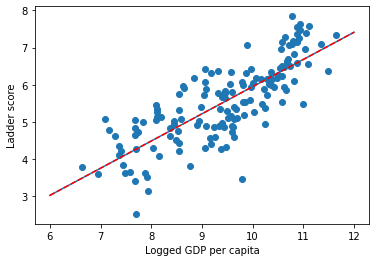

In [28]:
plt.scatter(X[:,0],y)
plt.plot(xval,yval)
plt.xlabel('Logged GDP per capita')
plt.ylabel('Ladder score')
plt.plot(xval,yval,'r--')

### 지하철 데이터에서 승차총승객수로 하차총승객수를 예측하는 선형회귀 모델을 만들기

In [29]:
subway=pd.read_csv('CARD_SUBWAY_MONTH_202106.csv')
subway.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,기타
0,20210601,3호선,신사,28955,30583,20210604,NaN
1,20210601,3호선,잠원,4780,4656,20210604,NaN
2,20210601,3호선,고속터미널,33986,32532,20210604,NaN
3,20210601,3호선,교대(법원.검찰청),14136,9362,20210604,NaN
4,20210601,3호선,남부터미널(예술의전당),27604,28821,20210604,NaN


In [33]:
#X=subway['승차총승객수'].values.reshape(-1,1)
X=subway[['승차총승객수']].values
y=subway['하차총승객수'].values
X.shape,y.shape

((18035, 1), (18035,))

(-4640.6, 97474.6, -4610.0, 96810.0)

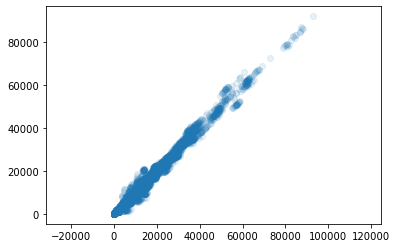

In [34]:
plt.scatter(X[:,0],y,alpha=0.1)
plt.axis('equal')